In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

grid_search_data = pd.read_csv('first_grid_search_results.csv', index_col=0)

In [2]:
grid_search_data.sort_values('means', ascending=False)

,filter_size,hidden_dims,num_filters,pool_size,means,stddev
44,3,50,100,50,0.557578,0.008692
24,3,10,200,50,0.556693,0.019770
19,3,10,100,50,0.556440,0.014469
69,3,100,100,50,0.556188,0.015759
59,3,100,20,50,0.555492,0.014300
49,3,50,200,50,0.554860,0.015304
64,3,100,50,50,0.554481,0.009144
89,5,10,50,50,0.552079,0.011023
34,3,50,20,50,0.551195,0.010271
83,5,10,20,20,0.550942,0.009334


In [3]:
print('Pearson correlation of each hyperparameter \nwith accuracy '
      'from 10-fold cv:')
grid_search_data.corr()['means'][:4]

Pearson correlation of each hyperparameter 
with accuracy from 10-fold cv:


filter_size   -0.321720
hidden_dims   -0.104940
num_filters   -0.263673
pool_size      0.741312
Name: means, dtype: float64

Without any further analysis, it seems there is a slight preference for small filter_size and large pool_size.
We should also vary pool_stride.

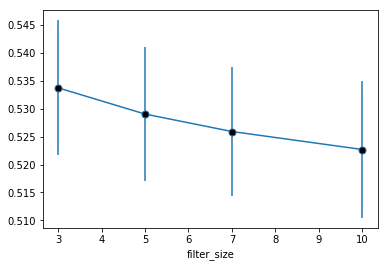

In [17]:
grouped = grid_search_data.groupby('filter_size')
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

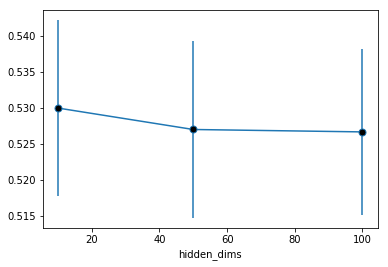

In [18]:
grouped = grid_search_data.groupby('hidden_dims')
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

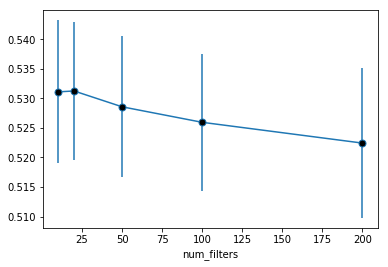

In [19]:
grouped = grid_search_data.groupby('num_filters')
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

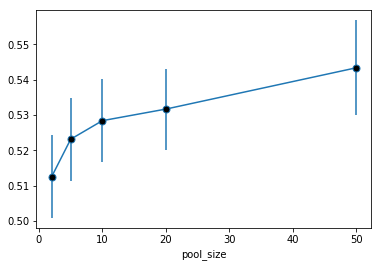

In [20]:
grouped = grid_search_data.groupby('pool_size')
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

# correlation between sets of 2?

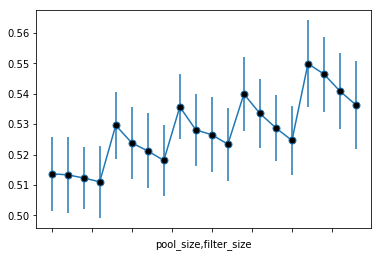

In [25]:
grouped = grid_search_data.groupby(['pool_size', 'filter_size'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

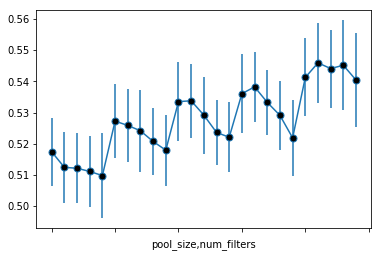

In [24]:
grouped = grid_search_data.groupby(['pool_size', 'num_filters'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

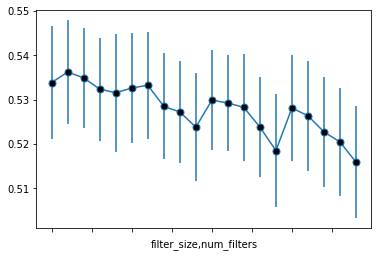

In [27]:
grouped = grid_search_data.groupby(['filter_size', 'num_filters'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

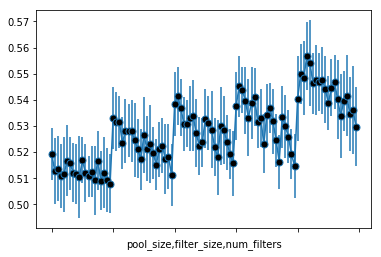

In [26]:
grouped = grid_search_data.groupby(['pool_size', 'filter_size', 'num_filters'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

In [ ]:
# current results indicate GlobalMaxPooling1D with small filter size will improve results

# second attempt, switching to max pooling and multiple fitler sizes

In [5]:
grid_search_two = pd.read_csv('second_grid_search_results.csv', index_col=0)
grid_search_two.sort_values('means', ascending=False)

,filter_sizes,num_filters,means,stddev
29,"(5, 7, 10)",200,0.638534,0.009223
39,"(3, 4, 5, 6)",200,0.635439,0.010293
33,"(10, 10, 10)",100,0.635250,0.009037
34,"(10, 10, 10)",200,0.634807,0.011488
13,"(5, 5, 5)",100,0.633733,0.014114
14,"(5, 5, 5)",200,0.632849,0.010271
23,"(7, 7, 7)",100,0.632786,0.014647
38,"(3, 4, 5, 6)",100,0.632660,0.007379
2,"(3, 3, 3)",50,0.632028,0.011632
28,"(5, 7, 10)",100,0.631586,0.010217


In [8]:
print('Pearson correlation of each hyperparameter \nwith accuracy '
      'from 10-fold cv:')
grid_search_two.corr()['means']

Pearson correlation of each hyperparameter 
with accuracy from 10-fold cv:


num_filters    0.714684
means          1.000000
stddev        -0.265817
Name: means, dtype: float64

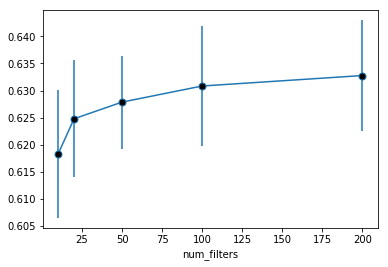

In [11]:
grouped = grid_search_two.groupby('num_filters')
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

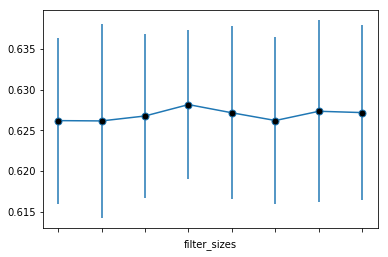

In [12]:
grouped = grid_search_two.groupby('filter_sizes')
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

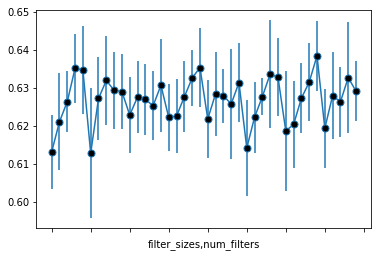

In [13]:
grouped = grid_search_two.groupby(['filter_sizes', 'num_filters'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')